<h1>RAINFALL PREDICTION

The project is to identify the relevant atmospheric features that cause rainfall and predict the intensity of daily rainfall using various machine learning algorithms..

Machine learning models can be used to predict rainfall patterns for specific regions, providing farmers with valuable insights to plan their farming activities. Flood Prediction and Management: Accurate rainfall prediction is critical in predicting and managing floods.

<h3>OBJECTIVE

<h4>Rainfall Prediction Model has a main objective in prediction of the amount of rain in a specific well or division in advance by using various regression and classification technique and find out which one is best for rainfall prediction.

<h3>Attribute Information

1) Day            : Day by day 1 year report in 365 days weather forcast
2) Pressure       : Gives Idea about Atmospheric pressure
3) Maxtemp        : Maximum Temperature of that day
4) Temparature    : Temparature of the day
5) Mintemp        : Minimum Temperature of that day
6) Dewpoint       : Dew point is the temperature to which air must be cooled for water vapor in in the sky.
7) Humidity       : Humidity is the concentration of water vapor present in the air.
8) Cloud          : A cloud is a mass of water drops or ice crystals suspended in the atmosphere. 
9) Rainfall       : "YES" or "NO"
10) Sunshine      : Sunshine of that perticular Day
11) Winddirection : Winddirection of that day
12) Windspeed     : Speed of the Wind

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Rainfall data.csv")

In [3]:
data

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20,20.9


<h3>Data Preprocessing</h3>

Pandas Profiling is a Python library that allows us to generate a very detailed report on our pandas dataframe without much input from the user. For saving time on Exploratory Data Analysis (EDA),This library is really helpful.

In [4]:
data.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.639344,21.542077
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.651052,10.056380
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.725000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.825000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [5]:
data.info()#Displays all information of each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  366 non-null    int64  
 11  windspeed               366 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 34.4+ KB


In [6]:
data.isna().sum() #Displays number of null values in each column

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    0
windspeed                 0
dtype: int64

In [7]:
pd.DataFrame(data.nunique())

,0
day,31
pressure,188
maxtemp,174
temparature,158
mintemp,157
dewpoint,158
humidity,49
cloud,79
rainfall,2
sunshine,104


In [8]:
#isnull() to check for missing values
data.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    0
windspeed                 0
dtype: int64

In [9]:
# Checking the values in the rainfall column
data['rainfall'].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [10]:
type(data)

pandas.core.frame.DataFrame

<h3>distribution of rainfall attribute

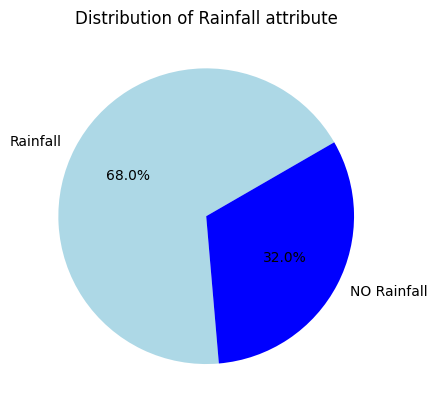

In [11]:
# Get value counts for rainfall column
counts = data['rainfall'].value_counts()

# Set custom labels for pie chart
labels = ['Rainfall', 'NO Rainfall']

# Create pie chart with custom colors and labels
colors = ['lightblue', 'Blue']
plt.pie(counts, colors=colors, labels=labels, autopct='%1.1f%%', startangle=30)

# Add plot title
plt.title("Distribution of Rainfall attribute")

# Show plot
plt.show()

conclusion :: Distribution of Rainfall in a Year . Piechart shows in that year 68% rainfall and 32% no rainfall accurs.

In [12]:
df=data

<h1>Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected. EDA is an important first step in any data analysis.

In [13]:
data.shape

(366, 12)

In [14]:
data.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.639344,21.542077
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.651052,10.056380
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.725000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.825000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [15]:
data.dtypes

day                         int64
pressure                  float64
maxtemp                   float64
temparature               float64
mintemp                   float64
dewpoint                  float64
humidity                    int64
cloud                       int64
rainfall                   object
sunshine                  float64
         winddirection      int64
windspeed                 float64
dtype: object

In [16]:
x = data.drop(['rainfall'],axis =1)

In [17]:
print(type(x))
x.head()

<class 'pandas.core.frame.DataFrame'>


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40,13.7


In [18]:
y =data['rainfall']

In [19]:
y

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
361    yes
362    yes
363    yes
364    yes
365     no
Name: rainfall, Length: 366, dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le_target = LabelEncoder()

In [22]:
y = le_target.fit_transform(y)

In [23]:
y

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [24]:
len(y)

366

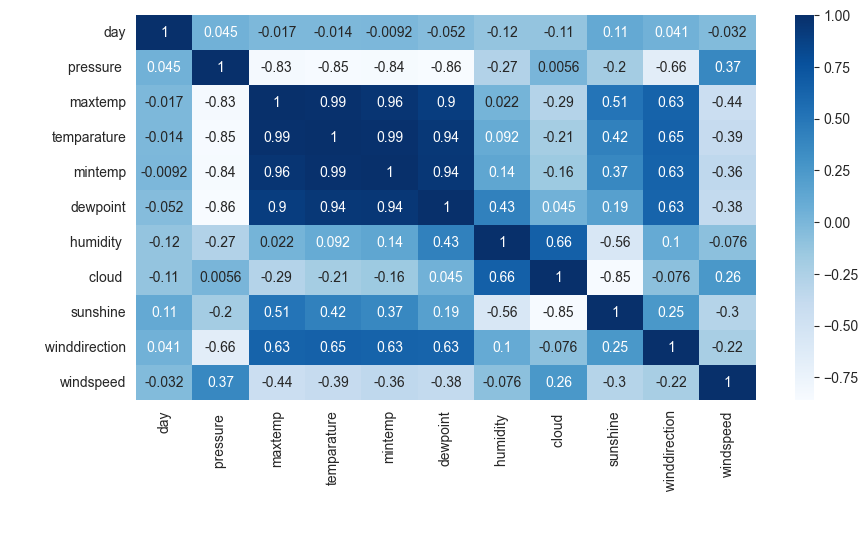

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set({'figure.figsize':(10,5)})
sns.heatmap(x.corr(), cmap="Blues", annot=True)
plt.show()

Conclusion :: That Heatmap shows us about relationship between variables. So we can say that humidity and cloud,winddirection and temp has a positive relation.

In [26]:
data

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20,20.9


<function matplotlib.pyplot.show(close=None, block=None)>

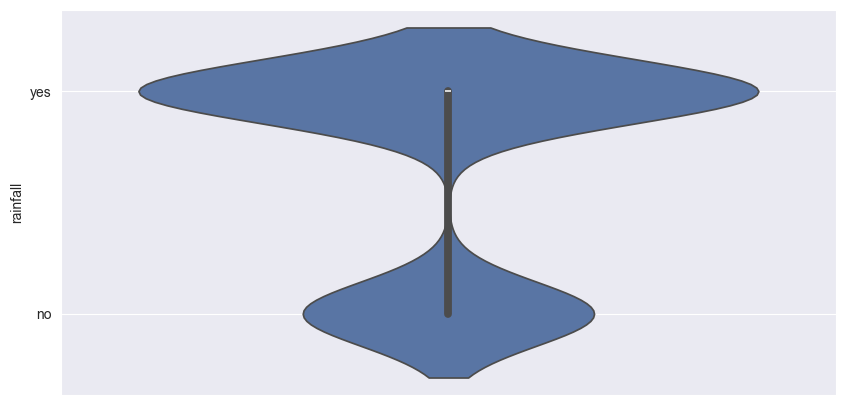

In [27]:
sns.violinplot( data['rainfall'])
plt.show

Conclusion :: In that violin plot we see the Distribution of rainfall over a year and it shows us more rainfall accurs in a year

<h1>Feature selection

In [28]:
x

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,0.0,30,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,1.0,20,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,4.6,70,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,1.2,20,20.9


In [29]:
y

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [30]:
x.shape

(366, 11)

In [31]:
y.shape

(366,)

In [32]:
correlation = x.corr()
correlation

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
day,1.000000,0.044638,-0.017045,-0.014100,-0.009241,-0.051521,-0.118652,-0.113152,0.108927,0.040902,-0.032267
pressure,0.044638,1.000000,-0.829088,-0.851780,-0.839851,-0.860232,-0.274907,0.005621,-0.198171,-0.662875,0.372584
maxtemp,-0.017045,-0.829088,1.000000,0.986193,0.961534,0.899829,0.021882,-0.289765,0.507416,0.630016,-0.441352
temparature,-0.014100,-0.851780,0.986193,1.000000,0.990187,0.936866,0.092030,-0.205895,0.420545,0.649282,-0.392981
mintemp,-0.009241,-0.839851,0.961534,0.990187,1.000000,0.944515,0.139040,-0.156097,0.368288,0.633961,-0.358337
dewpoint,-0.051521,-0.860232,0.899829,0.936866,0.944515,1.000000,0.425282,0.044635,0.185234,0.628655,-0.377462
humidity,-0.118652,-0.274907,0.021882,0.092030,0.139040,0.425282,1.000000,0.655493,-0.563579,0.102083,-0.076281
cloud,-0.113152,0.005621,-0.289765,-0.205895,-0.156097,0.044635,0.655493,1.000000,-0.848334,-0.075530,0.258525
sunshine,0.108927,-0.198171,0.507416,0.420545,0.368288,0.185234,-0.563579,-0.848334,1.000000,0.253902,-0.298495
winddirection,0.040902,-0.662875,0.630016,0.649282,0.633961,0.628655,0.102083,-0.075530,0.253902,1.000000,-0.219546


# Training Model

Training a model simply means learning (determining) good values for all the weights and the bias from labeled examples.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [35]:
len(x_train)

256

In [36]:
len(x_test)

110

## Logistic Regression

It is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation.

Equation :: Probability of Event Occurance/Probability of No Event Occurance   (p/(1-p))

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model= LogisticRegression()

In [39]:
model

LogisticRegression()

In [40]:
model.fit(x_train, y_train)

c:\Users\jay\Desktop\Rushi project\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
x_test

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
106,16,1010.5,28.1,24.7,20.6,22.7,89,81,3.5,210,15.3
259,16,1011.9,31.0,28.1,26.9,24.5,81,86,2.1,70,32.2
45,15,1024.3,17.5,13.2,11.4,6.6,64,88,0.0,20,33.5
26,27,1022.7,15.3,13.0,9.8,11.6,92,95,0.2,20,29.6
78,19,1013.0,24.9,22.4,20.3,21.4,94,85,1.5,40,12.5
...,...,...,...,...,...,...,...,...,...,...,...
217,5,1006.1,33.3,29.6,27.6,24.4,74,27,10.8,220,8.7
145,25,1007.8,30.9,28.0,26.2,24.7,82,62,8.8,100,16.2
318,14,1014.5,26.9,24.3,22.3,21.2,83,74,5.5,30,13.8
234,22,1000.1,32.0,30.2,28.4,24.4,71,48,6.1,10,12.0


In [42]:
y_pred = model.predict(x_test)

In [43]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [44]:
model.predict_proba(x_test) 

array([[0.08800708, 0.91199292],
       [0.06286537, 0.93713463],
       [0.27415796, 0.72584204],
       [0.02521089, 0.97478911],
       [0.04519344, 0.95480656],
       [0.09728311, 0.90271689],
       [0.11614533, 0.88385467],
       [0.13249091, 0.86750909],
       [0.18969586, 0.81030414],
       [0.58329449, 0.41670551],
       [0.03792874, 0.96207126],
       [0.06320096, 0.93679904],
       [0.33178551, 0.66821449],
       [0.69250831, 0.30749169],
       [0.0513101 , 0.9486899 ],
       [0.78353069, 0.21646931],
       [0.55571942, 0.44428058],
       [0.04532594, 0.95467406],
       [0.43594693, 0.56405307],
       [0.02298577, 0.97701423],
       [0.30620438, 0.69379562],
       [0.48402443, 0.51597557],
       [0.95734802, 0.04265198],
       [0.5704765 , 0.4295235 ],
       [0.28051193, 0.71948807],
       [0.72138103, 0.27861897],
       [0.0494177 , 0.9505823 ],
       [0.69886315, 0.30113685],
       [0.04849224, 0.95150776],
       [0.10209481, 0.89790519],
       [0.

# Find Probability

In [45]:
y_test

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [46]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

## BETA 1

In [47]:
model.coef_
# beta 1

array([[ 0.05224475, -0.00809402,  0.05784169,  0.04803284, -0.11125241,
         0.08539432,  0.04991413,  0.04190985, -0.19199393, -0.00120441,
         0.02032133]])

## BETA θ


In [48]:
model.intercept_
# beta 0

array([-0.00017431])

## Confusion Matrix

A confusion matrix is a performance evaluation tool in machine learning, representing the accuracy of a classification model. It displays the number of true positives, true negatives, false positives, and false negatives.

In [49]:

# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[29  7]
 [ 9 65]]


## Accuracy Score

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score (y_test,y_pred)
accuracy

0.8545454545454545

## Random Forest

It is a superwised ML technique which is used for  classification & Regression types of problem. It is a base learner of Decision Tree. In a random forest multiple decision trees are constructed. It uses ensemble method that focuses combining weak learner to form a strong learner.

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import classification_report

In [52]:
model_rf = RandomForestClassifier(max_depth=8, min_samples_leaf=1, n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [53]:
y_predict_train = model_rf.predict(x_train) 

In [54]:
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1       0.99      1.00      0.99       175

    accuracy                           0.99       256
   macro avg       0.99      0.99      0.99       256
weighted avg       0.99      0.99      0.99       256



In [55]:
y_predict_test = model_rf.predict(x_test) 

In [56]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        36
           1       0.89      0.86      0.88        74

    accuracy                           0.84       110
   macro avg       0.81      0.82      0.82       110
weighted avg       0.84      0.84      0.84       110



In [57]:
from sklearn.metrics import precision_score,recall_score

In [58]:
from sklearn.metrics import precision_score,recall_score
rf_recall=recall_score(y_test, y_predict_test)
rf_precision=precision_score(y_test, y_predict_test)
print(rf_recall,rf_precision)

0.8648648648648649 0.8888888888888888


## Cross Validation



Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfiting.                                                                 
Ex :: If we have a data that stores 100 observations then we split then 25 25 observations 4 groups are generated then we perform our training testing on them 1 by 1.g

In [59]:
from sklearn.model_selection import cross_val_score,cross_val_predict,GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Instantiate a Random Forest classifier
clf = RandomForestClassifier(max_depth=8, min_samples_leaf=1, n_estimators=100, random_state=42)
strat_k_fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Perform 5-fold cross-validation and print the mean accuracy
strat_Fold_predict_train=cross_val_predict(clf,x_train,y_train,cv=strat_k_fold)

In [60]:
strat_Fold_predict_train.shape

(256,)

In [61]:
print(classification_report(y_train,strat_Fold_predict_train))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65        81
           1       0.83      0.89      0.86       175

    accuracy                           0.80       256
   macro avg       0.77      0.75      0.75       256
weighted avg       0.79      0.80      0.79       256



In [62]:
from sklearn.metrics import precision_score,recall_score
rf_smot_recall=recall_score(y_train,strat_Fold_predict_train)
rf_smot_precision=precision_score(y_train,strat_Fold_predict_train)
print(rf_recall,rf_precision)

0.8648648648648649 0.8888888888888888


In [63]:
data['rainfall'].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

## K-NN Classifier

It is a superwised ML technique which is used for classification & Regression types of problem. When making prediction ,it calculates distance between data points by using Euclidean distance formula.

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
model_knn = KNeighborsClassifier(metric='minkowski', n_neighbors=15, weights='uniform')
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [66]:
y_predict_test = model_knn.predict(x_test)

In [67]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.47      0.61        36
           1       0.79      0.96      0.87        74

    accuracy                           0.80       110
   macro avg       0.82      0.72      0.74       110
weighted avg       0.81      0.80      0.78       110



### New Model

In [68]:
model2 = KNeighborsClassifier()

In [69]:
model2.fit(x_train, y_train)

KNeighborsClassifier()

In [70]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [71]:
accuracy_score(y_test, y_pred)

0.8545454545454545

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [73]:
confusion_matrix(y_test, y_pred)

array([[29,  7],
       [ 9, 65]])

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        36
           1       0.90      0.88      0.89        74

    accuracy                           0.85       110
   macro avg       0.83      0.84      0.84       110
weighted avg       0.86      0.85      0.86       110



In [75]:
model2 = KNeighborsClassifier(p=1)
model2.fit(x_train, y_train)
y_pred1 = model.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8545454545454545
[[29  7]
 [ 9 65]]


In [76]:
model2 = KNeighborsClassifier(p=3)
model2.fit(x_train, y_train)
y_pred1 = model.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8545454545454545
[[29  7]
 [ 9 65]]


In [77]:
model2 = KNeighborsClassifier(p=4)
model2.fit(x_train, y_train)
y_pred1 = model.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8545454545454545
[[29  7]
 [ 9 65]]


## XGBoost

It is a superwised ML technique which is used for classification & Regression types of problem. Extreme Gradient Boosting is full form of XGBoost. It's base model is Decision tree and Random forest. It also works with data has missing or null values.

In [79]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 186.2 kB/s eta 0:11:11
   ---------------------------------------- 0.0/124.9 MB 195.7 kB/s eta 0:10:39
   ---------------------------------------- 0.1/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.2/124.9 MB 538.9 kB/s eta 0:03:52
   ---------------------------------------- 0.3/124.9 MB 850.6 kB/s eta 0:02:27
   ---------------------------------------- 0.6/124.9 MB 1.5 MB/s eta 0:01:25
   -----------------------------


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
import xgboost as xgb

In [81]:
from xgboost import XGBClassifier

In [82]:
model_xgb=XGBClassifier(learning_rate= 0.1, max_depth=3, n_estimators=100)

In [83]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [84]:
y_predict_test= model_xgb.predict(x_test)

In [85]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        36
           1       0.89      0.88      0.88        74

    accuracy                           0.85       110
   macro avg       0.82      0.83      0.83       110
weighted avg       0.85      0.85      0.85       110



In [87]:
from sklearn.metrics import precision_score,recall_score
xgb_recall=recall_score(y_test, y_predict_test)
xgb_precision=precision_score(y_test, y_predict_test)
print(xgb_recall,xgb_precision)

0.8783783783783784 0.8904109589041096


In [88]:
clf = XGBClassifier(learning_rate= 0.1, max_depth=3, n_estimators=100)
strat_k_fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

strat_Fold_predict_train=cross_val_predict(clf,x_train,y_train,cv=strat_k_fold)

In [89]:
confusion_matrix(y_train,strat_Fold_predict_train)

array([[ 44,  37],
       [ 24, 151]])

### New Model

In [90]:
model3 = xgb.XGBClassifier()

In [91]:
model3.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [92]:
y_pred = model3.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [93]:
accuracy_score(y_test, y_pred)

0.8090909090909091

In [94]:
confusion_matrix(y_test, y_pred)

array([[25, 11],
       [10, 64]])

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        36
           1       0.85      0.86      0.86        74

    accuracy                           0.81       110
   macro avg       0.78      0.78      0.78       110
weighted avg       0.81      0.81      0.81       110



## SVM

Support Vector Machine. It is a superwised ML technique which is used for classification & Regression types of problem. SVM is a line which seperates the 2 classes from 1 another. Support Vectors are the coordinates of thr individual observations.

In [96]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import SVC

model_svc = SVC()
model_svc = CalibratedClassifierCV(model_svc) 
model_svc.fit(x_train, y_train)

CalibratedClassifierCV(estimator=SVC())

In [97]:
y_predict_test= model_svc.predict(x_test)

In [98]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        36
           1       0.88      0.92      0.90        74

    accuracy                           0.86       110
   macro avg       0.85      0.83      0.84       110
weighted avg       0.86      0.86      0.86       110



In [99]:
accuracy_score(y_test, y_predict_test)

0.8636363636363636

## New MOdel

In [100]:
from sklearn.svm import SVC
model4 = SVC(kernel='linear')

In [101]:
model4.fit(x_train, y_train)

SVC(kernel='linear')

In [102]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred)

0.8090909090909091

In [103]:
confusion_matrix(y_test, y_pred)

array([[25, 11],
       [10, 64]])

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        36
           1       0.85      0.86      0.86        74

    accuracy                           0.81       110
   macro avg       0.78      0.78      0.78       110
weighted avg       0.81      0.81      0.81       110



## Ada Boost

Adaboost is an ensemble learning technique used to improve the predictive accuracy of any given model by combining multiple “weak” learners.

In [105]:
from sklearn.ensemble import AdaBoostClassifier

In [106]:
model_ada = AdaBoostClassifier(learning_rate= 0.1,n_estimators=100)

In [107]:
model_ada.fit(x_train,y_train)

c:\Users\jay\Desktop\Rushi project\myenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [108]:
y_predict_test= model_ada.predict(x_test)

In [109]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        36
           1       0.89      0.86      0.88        74

    accuracy                           0.84       110
   macro avg       0.81      0.82      0.82       110
weighted avg       0.84      0.84      0.84       110



In [110]:
accuracy_score(y_test, y_predict_test)

0.8363636363636363

## DECISION TREE

It is a superwised ML technique which is used for classification & Regression types of problem. It builds a model in a tree structure,it breaks down a dataset into smaller & smaller subset while at same time an associated decision trees is incrementally developed.

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
model_dt = DecisionTreeClassifier(max_features=5, min_samples_split=11)

In [114]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_features=5, min_samples_split=11)

In [115]:
y_predict_test= model_ada.predict(x_test)

In [116]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        36
           1       0.89      0.86      0.88        74

    accuracy                           0.84       110
   macro avg       0.81      0.82      0.82       110
weighted avg       0.84      0.84      0.84       110



In [117]:
accuracy_score(y_test, y_predict_test)

0.8363636363636363

## New Model

In [118]:
from sklearn import tree

In [119]:
model5 = tree.DecisionTreeClassifier(criterion='entropy')

In [120]:
model5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [121]:
import matplotlib.pyplot as plt

In [122]:
pred_test = model5.predict(x_test)

In [123]:
from sklearn.metrics import accuracy_score,classification_report

In [124]:
accuracy_score(y_test, pred_test)

0.7363636363636363

In [125]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.59      0.64      0.61        36
           1       0.82      0.78      0.80        74

    accuracy                           0.74       110
   macro avg       0.70      0.71      0.71       110
weighted avg       0.74      0.74      0.74       110



In [128]:
y_test

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [126]:
import pickle

In [127]:
with open('rainfall.pkl','wb')as file:
    pickle.dump(model_svc,file)